# Random Observations

In [1]:
import numpy as np
import pandas as pd

In [2]:
def random_datapoint(dimensions):
  datapoint = np.empty(len(dimensions)) #empty numpy array
  for varPos, varDimension in enumerate(dimensions):
    datapoint[varPos] = np.random.choice(range(varDimension)) #fills the empty numpy array with integers within the range of a given value
  return datapoint #returns the filled numpy array

def generate_random_dataframe(sampleNum, variableDict):
  shape = [sampleNum, len(list(variableDict.values()))] #gets the shape of the dict
  sampleValues = np.empty(shape)  #gets the number of values
  for samplePos in range(sampleNum):
    sampleValues[samplePos] = random_datapoint(variableDict.values()) #uses the random_datapoint func. to assign random values
  return pd.DataFrame(data = sampleValues, columns=list(variableDict.keys())) #returns the dict in pandas dataframe format

In [3]:
variableDict = {        #we have 
    "semester" : 4,     #semester variable from 0 to 3
    "age" : 30          #age variable from 0 to 30
}

samples = generate_random_dataframe(10,variableDict)
print(samples)

   semester   age
0       1.0  17.0
1       3.0  19.0
2       2.0   5.0
3       2.0  18.0
4       1.0   6.0
5       0.0   6.0
6       1.0   8.0
7       2.0   4.0
8       2.0   0.0
9       0.0   9.0


# One-hot encoding: Naive and CP Decomposition

In [4]:
def one_hot_encoding_sample(row, variableDict):
  oh_sample = np.zeros(list(variableDict.values()))
  oh_sample[tuple([int(entry) for entry in row])] = 1
  return oh_sample  #returns a numpy array containing 1 for every row that has data in the original sample frame and zero for empty rows

def one_hot_encoding(df, variableDict):
  sampleNum = df.shape[0] #len of input sample frames
  oh_encoding = np.empty([sampleNum]+list(variableDict.values()))
  for i, row in df.iterrows():
    oh_encoding[i] = one_hot_encoding_sample(row, variableDict) #splits the oh_sample from the simple encoding into separate arrays
  return oh_encoding #returns a dict containing numpy arrays containing the one hot encoding of our dataframe ==> quantum encoding

In [5]:
naive_oh_encoding = one_hot_encoding(samples, variableDict)
print(np.sum(naive_oh_encoding))
print(naive_oh_encoding.shape)

10.0
(10, 4, 30)


In [6]:
semester_oh_encoding = one_hot_encoding(samples["semester"].to_frame(), {"semester":4})
print(np.sum(semester_oh_encoding))
print(semester_oh_encoding.shape)

10.0
(10, 4)


In [7]:
age_oh_encoding = one_hot_encoding(samples["age"].to_frame(), {"age":30})
print(np.sum(age_oh_encoding))
print(age_oh_encoding.shape)

10.0
(10, 30)


In [8]:
cp_tensor = np.einsum("ls,la->lsa", semester_oh_encoding, age_oh_encoding)
print(cp_tensor.shape)
print(np.sum(cp_tensor))
#cp_tensor

(10, 4, 30)
10.0


In [9]:
np.linalg.norm(cp_tensor-naive_oh_encoding)

0.0

In [10]:
print(samples)

   semester   age
0       1.0  17.0
1       3.0  19.0
2       2.0   5.0
3       2.0  18.0
4       1.0   6.0
5       0.0   6.0
6       1.0   8.0
7       2.0   4.0
8       2.0   0.0
9       0.0   9.0


In [11]:
print(semester_oh_encoding[0])
print(age_oh_encoding[0])

[0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [12]:
print(naive_oh_encoding[1])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]


In [13]:
emp_distribution = 1/10*np.einsum("ls,la->sa", semester_oh_encoding, age_oh_encoding)
print(emp_distribution)

[[0.  0.  0.  0.  0.  0.  0.1 0.  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.1 0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.1
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.1 0.  0.  0.  0.1 0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.1 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]]


# Larger Examples

In [14]:
largeExample={"var_"+str(i):5 for i in range(20)}
sampleNum = 1000
largeExample

{'var_0': 5,
 'var_1': 5,
 'var_2': 5,
 'var_3': 5,
 'var_4': 5,
 'var_5': 5,
 'var_6': 5,
 'var_7': 5,
 'var_8': 5,
 'var_9': 5,
 'var_10': 5,
 'var_11': 5,
 'var_12': 5,
 'var_13': 5,
 'var_14': 5,
 'var_15': 5,
 'var_16': 5,
 'var_17': 5,
 'var_18': 5,
 'var_19': 5}

In [15]:
largeDf = generate_random_dataframe(sampleNum, largeExample)
largeDf

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19
0,0.0,4.0,4.0,3.0,3.0,1.0,2.0,2.0,4.0,1.0,3.0,4.0,1.0,4.0,0.0,4.0,2.0,2.0,2.0,0.0
1,2.0,1.0,1.0,0.0,1.0,3.0,3.0,4.0,4.0,1.0,2.0,3.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,2.0
2,4.0,4.0,2.0,0.0,1.0,3.0,2.0,0.0,1.0,3.0,3.0,1.0,2.0,4.0,3.0,0.0,1.0,3.0,1.0,2.0
3,2.0,2.0,3.0,0.0,1.0,0.0,1.0,3.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,4.0
4,4.0,1.0,2.0,2.0,2.0,1.0,1.0,4.0,1.0,4.0,3.0,2.0,3.0,1.0,3.0,1.0,0.0,2.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,2.0,3.0,2.0,2.0,0.0,0.0,0.0,3.0,4.0,3.0,0.0,2.0,4.0,2.0,2.0,0.0,0.0,4.0,0.0
996,0.0,2.0,2.0,3.0,2.0,3.0,4.0,1.0,2.0,1.0,1.0,2.0,3.0,4.0,1.0,1.0,2.0,1.0,2.0,2.0
997,0.0,4.0,3.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,4.0,0.0,4.0,0.0,1.0,2.0,0.0,0.0,3.0
998,2.0,2.0,2.0,1.0,2.0,0.0,4.0,3.0,1.0,3.0,0.0,2.0,3.0,1.0,4.0,0.0,4.0,4.0,4.0,4.0


In [16]:
## The naive one hot encoding is too large to be stored:
one_hot_encoding(largeDf, largeExample)

MemoryError: Unable to allocate 678. PiB for an array with shape (1000, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5) and data type float64

In [14]:
oh_encoding_dict = {"oh_encoding_"+str(i): one_hot_encoding(largeDf["var_"+str(i)].to_frame(),{"var_"+str(i): 5})
for i in range(20)}

In [15]:
oh_encoding_dict["oh_encoding_0"].shape

(1000, 5)

# Representation in tnreason: Empirical Distribution

By default, tnreason stores empirical distributions in the CP Decomposition. It takes as input a DataFrame of uncertainties, whether the atom of the respective column is true.

In [17]:
import pandas as pd

bool_states = {}

for state in range(4):
  bool_mask = samples["semester"] == state
  bool_states["semester" + str(state)] = bool_mask

for state in range(30):
  bool_mask = samples["age"] == state
  bool_states["age" + str(state)] = bool_mask

atomicRepresentation = pd.DataFrame(bool_states)

In [18]:
from tnreason import knowledge
empDistribution = knowledge.EmpiricalDistribution(atomicRepresentation)

To each variable in the DataFrame of samples, a tensor core is created.

In [19]:
cores = empDistribution.create_cores()
print(cores)

{'semester0_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DACA1B80>, 'semester1_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1CE610>, 'semester2_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1CEA00>, 'semester3_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1CEB80>, 'age0_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1CED00>, 'age1_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1CEE80>, 'age2_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1DA040>, 'age3_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1DA1C0>, 'age4_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1DA340>, 'age5_dataCore': <tnreason.engine.workload_to_numpy.NumpyCore object at 0x00000117DC1DA4C0>, 'age6_dataCore': <tnreason.engine.workload_to_num

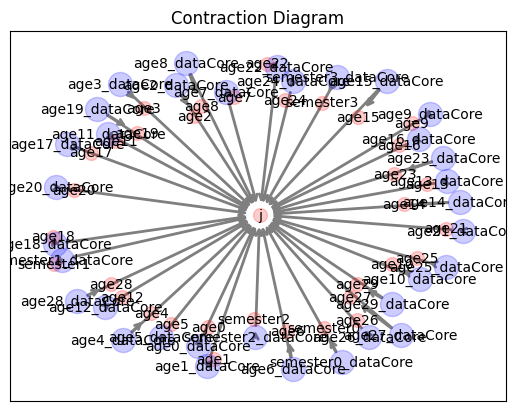

: 

In [20]:
from tnreason import engine
engine.draw_contractionDiagram(cores)